In [ ]:
# default_exp explore
%load_ext autoreload
%autoreload 2

# explore

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

![explore](images/graphic7.PNG)

In [ ]:
#export
from fastai.vision.all import *
from fastai.medical.imaging import *
from torchvision.utils import save_image
import imageio
matplotlib.rcParams['image.cmap'] = 'bone'

from fmi.pipeline import *
from matplotlib import patches, patheffects

### System Info

In [ ]:
#export
def system_info():
    RED = '\033[31m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    BOLD   = '\033[1m'
    ITALIC = '\033[3m'
    RESET  = '\033[0m'
 
    import fastai; print(BOLD + BLUE + "fastai Version: " + RESET + ITALIC + str(fastai.__version__))
    import fastcore; print(BOLD + BLUE + "fastcore Version: " + RESET + ITALIC + str(fastcore.__version__))
    import sys; print(BOLD + BLUE + "python Version: " + RESET + ITALIC + str(sys.version))
    import torchvision; print(BOLD + BLUE + "torchvision: " + RESET + ITALIC + str(torchvision.__version__))
    import torch; print(BOLD + BLUE + "torch version: " + RESET + ITALIC + str(torch.__version__))
    print(BOLD + BLUE + "\nCuda: " + RESET + ITALIC + str(torch.cuda.is_available()))
    try:
        print(BOLD + BLUE + "Cuda Version: " + RESET + ITALIC + str(torch.version.cuda))
    except AssertionError:
        print(BOLD + BLUE + "Cuda Version Unavailable")
    try:
        print(BOLD + BLUE + "GPU: " + RESET + ITALIC + str(torch.cuda.get_device_name(0)))
    except RuntimeError:
        print(BOLD + BLUE + "No GPU selected")
    except AssertionError: 
        print(BOLD + BLUE +  "Torch not compiled with CUDA enabled")
    try:
        import pydicom; print(BOLD + BLUE + "\npydicom Version: " + RESET + ITALIC + str(pydicom.__version__))
    except RuntimeError:
        print('Pydicom is not installed')
    try:
        import kornia; print(BOLD + BLUE + "kornia Version: " + RESET + ITALIC + str(kornia.__version__))
    except RuntimeError:
        print('Kornia is not installed')

In [ ]:
system_info()

fastai Version: 2.4
fastcore Version: 1.3.20
python Version: 3.8.10 (default, May 19 2021, 13:12:57) [MSC v.1916 64 bit (AMD64)]
torchvision: 0.8.2+cu110
torch version: 1.7.1+cu110

Cuda: True
Cuda Version: 11.0
GPU: NVIDIA GeForce RTX 3070 Laptop GPU

pydicom Version: 2.1.2
kornia Version: 0.2.0


In [ ]:
source = 'C:/PillView/Datasets/osic-pulmonary-fibrosis-progression/train/'
sort_items = get_dicom_files(source, folders='ID00007637202177411956430')
sort_items

(#9) [Path('C:/PillView/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/1.dcm'),Path('C:/PillView/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/10.dcm'),Path('C:/PillView/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/11.dcm'),Path('C:/PillView/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/12.dcm'),Path('C:/PillView/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/13.dcm'),Path('C:/PillView/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/14.dcm'),Path('C:/PillView/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/15.dcm'),Path('C:/PillView/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/16.dcm'),Path('C:/PillView/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/17.dcm')]

In [ ]:
#export
def random_(items, value=10):
    "Helper to generate a random list"
    randomList = []
    for i in range(0,value):
        randomList.append(random.randint(0,len(items)))
    return items[randomList]

In [ ]:
sort_items[0].dcmread()

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.12297650151329871895440507938349160734
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0018) SOP Instance UID                    UI: 2.25.12297650151329871895440507938349160734
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) 

### Identifiers

Typically the head of a dicom can contain alot of information.  

To quickly view important parts of the dicom we can use specific identifiers which are key aspects within the dicom head that provide information that may be useful when exploring the dicom dataset.

> `get_image_info` displays image specific identifiers

> `get_pii` looks for personal identifiable information

In [ ]:
#export
def get_image_info(file: (L)):
    "Display image specific identifiers in the head of the dicom"
    dcm = file.dcmread()
    try:
        print(f'{dcm[0x08, 0x60]}')
    except KeyError:
        print('No Modality')
    try:
        print(f'{dcm[0x28, 0x04]}')
    except KeyError:
        print('No Photometric Interpretation')
    try:
        print(f'{dcm[0x28, 0x30]}')
    except KeyError:
        print('No Pixel Spacing')
    try:
        print(f'{dcm[0x18, 0x50]}')
    except KeyError:
        print('No SliceThickness')
    try:
        print(f'{dcm[0x28, 0x100]}')
    except KeyError:
        print('No Bits Allocated')
    try:
        print(f'{dcm[0x28, 0x101]}')
    except KeyError:
        print('No Bits Stored')
    try:
        print(f'{dcm[0x28, 0x103]}')
    except KeyError:
        print('No Pixel Representation')
    try:
        print(f'{dcm[0x28, 0x120]}')
    except KeyError:
        print('No Pixel Padding Value')
    try:
        print(f'{dcm[0x28, 0x1052]}')
    except KeyError:
        print('No Rescale Intercept')
    try:
        print(f'{dcm[0x28, 0x1053]}')
    except KeyError:
        print('No Rescale Slope')

In [ ]:
show_doc(get_image_info)

<h4 id="get_image_info" class="doc_header"><code>get_image_info</code><a href="__main__.py#L2" class="source_link" style="float:right">[source]</a></h4>

> <code>get_image_info</code>(**`file`**:`L`)

Display image specific identifiers in the head of the dicom

In [ ]:
get_image_info(sort_items[0])

(0008, 0060) Modality                            CS: 'CT'
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0030) Pixel Spacing                       DS: [0.652344, 0.652344]
(0018, 0050) Slice Thickness                     DS: "1.25"
(0028, 0100) Bits Allocated                      US: 16
(0028, 0101) Bits Stored                         US: 16
(0028, 0103) Pixel Representation                US: 1
(0028, 0120) Pixel Padding Value                 SS: -2000
(0028, 1052) Rescale Intercept                   DS: "-1024.0"
(0028, 1053) Rescale Slope                       DS: "1.0"


In [ ]:
#export
def get_pii(file: (L)):
    "Disply any patient identifiable identifiers in the head of the dicom"
    dcm = file.dcmread()
    try:
        print(f'{dcm[0x10, 0x10]}')
    except KeyError:
        print('No Patient Name')
    try:
        print(f'{dcm[0x10, 0x30]}')
    except KeyError:
        print('No Patient Birth Date')
    try:
        print(f'{dcm[0x10, 0x40]}')
    except KeyError:
        print('No Patient Sex')
    try:
        print(f'{dcm[0x10, 0x1010]}')
    except KeyError:
        print('No patient Age')
    try:
        print(f'{dcm[0x20, 0x4000]}')
    except KeyError:
        print('No Image Comments')
    try:
        print(f'{dcm[0x12, 0x63]}')
    except KeyError:
        print('No De-Identification method')
    try:
        print(f'{dcm[0x12, 0x64]}')
    except KeyError:
        print('No De-identification Method Code Sequence')

In [ ]:
show_doc(get_pii)

<h4 id="get_pii" class="doc_header"><code>get_pii</code><a href="__main__.py#L2" class="source_link" style="float:right">[source]</a></h4>

> <code>get_pii</code>(**`file`**:`L`)

Disply any patient identifiable identifiers in the head of the dicom

In [ ]:
get_pii(sort_items[0])

(0010, 0010) Patient's Name                      PN: 'ID00007637202177411956430'
No Patient Birth Date
(0010, 0040) Patient's Sex                       CS: ''
No patient Age
No Image Comments
(0012, 0063) De-identification Method            LO: 'Table;'
No De-identification Method Code Sequence


### Instance Sort

Many dicom datasets have multiple slices of images for the same patient.  For example with [this](https://www.kaggle.com/c/osic-pulmonary-fibrosis-progression) dataset each folder represents a single patient and each folder can have multiple slices. 

> Note: View sort tutorial on Kaggle (click on Kaggle icon)

[<img src="images/kaggle.PNG" alt="kaggle" align="left" width="80" height="36" />](https://www.kaggle.com/avirdee/sort-tutorial/)

In this example there are 30 images within the folder.  To view them:

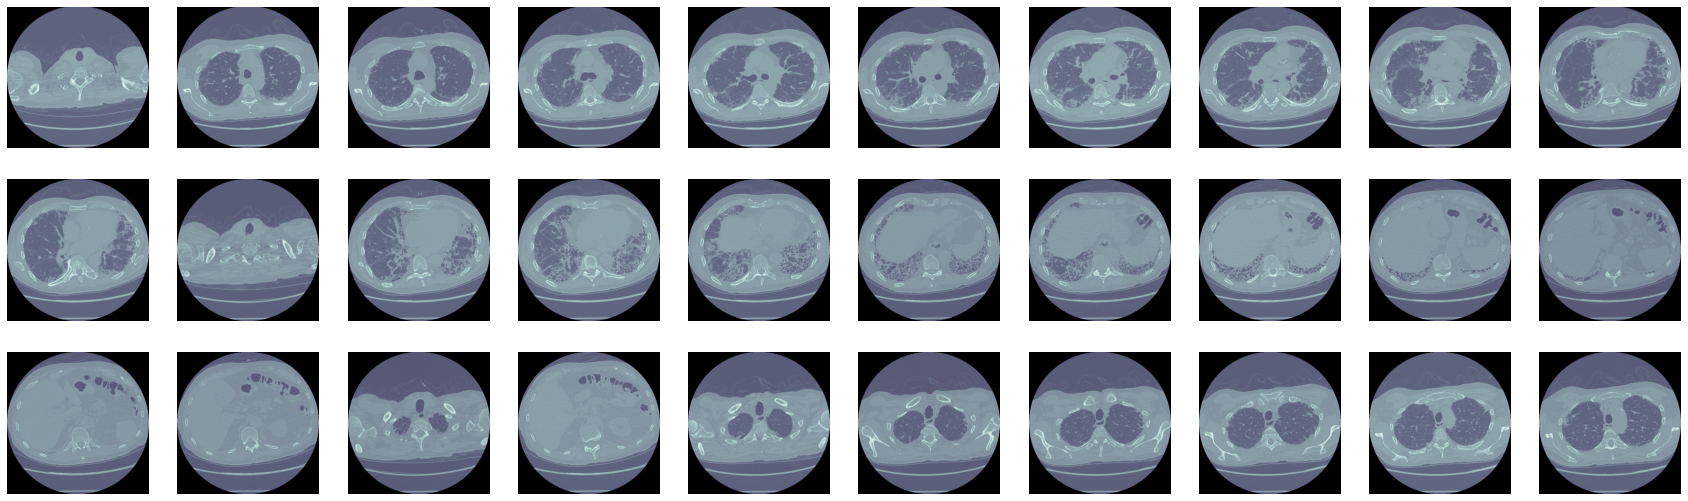

In [ ]:
imgs = []
for filename in sort_items:
    file = filename.dcmread().pixel_array
    img = TensorDicom(file)
    imgs.append(img)
show_images(imgs, nrows=3)

We notice that the images are not in sequence.  Dicoms typically have an `InstanceNumber` which can be used to display the images in sequence.

In [ ]:
#export
def instance_sort(folder:(Path, L)):
    "Helper to sort files by instance number/ID"
    if isinstance(folder, Path): folder = get_dicom_files(folder)
    if isinstance(folder, L): folder = folder
    sorted_files = []
    for file in folder:
        instance = file.dcmread()[0x20, 0x13].value
        sorted_files.append([instance, file])
    return L(sorted(sorted_files))

In [ ]:
show_doc(instance_sort)

<h4 id="instance_sort" class="doc_header"><code>instance_sort</code><a href="__main__.py#L2" class="source_link" style="float:right">[source]</a></h4>

> <code>instance_sort</code>(**`folder`**:`L'>)`)

Helper to sort files by instance number/ID

In [ ]:
#export
def instance_dcmread(folder:(L)):
    "instance dcmread"
    file = [dcmread(o[1]) for o in folder]
    return file

In [ ]:
show_doc(instance_dcmread)

<h4 id="instance_dcmread" class="doc_header"><code>instance_dcmread</code><a href="__main__.py#L2" class="source_link" style="float:right">[source]</a></h4>

> <code>instance_dcmread</code>(**`folder`**:`L`)

instance dcmread

In [ ]:
#export
def instance_show(folder: (L), nrows=1):
    "Helper to display sorted files by instance number"
    f_list = []; t_list = []
    for file in instance_sort(folder):
        f = TensorDicom(file[1].dcmread().pixel_array)
        f_list.append(f); t_list.append(file[0])
    return show_images(f_list, titles=t_list, nrows=nrows)

In [ ]:
show_doc(instance_show)

<h4 id="instance_show" class="doc_header"><code>instance_show</code><a href="__main__.py#L2" class="source_link" style="float:right">[source]</a></h4>

> <code>instance_show</code>(**`folder`**:`L`, **`nrows`**=*`1`*)

Helper to display sorted files by instance number

We can simply view the images in sequence by using `instance_show`

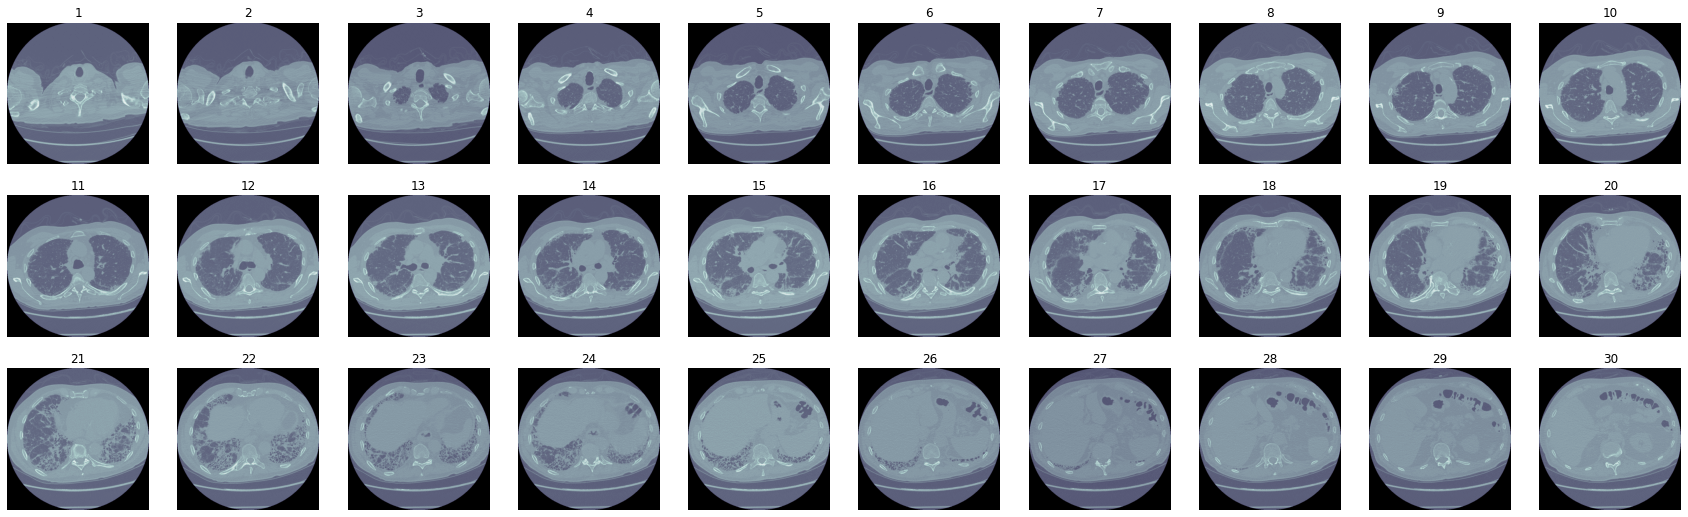

In [ ]:
instance_show(sort_items, nrows=3)

### Scaled_px

<img src="images/git_merged.PNG" alt="merged" align="left"
	width="124" height="59" />
    
This update has been successfully merged with `fastai.medical.imaging`

Currently `fastai.medical.imaging` did not take into consideration if the dicom files did not have `RescaleSlope` and/or `RescaleIntercept` it would throw an error.  This fix checks to see if these values are present or not.

In [ ]:
#export
@patch(as_prop=True)
def scaled_px(self:DcmDataset):
    "`pixels` scaled by `RescaleSlope` and `RescaleIntercept`"
    img = self.pixels
    if hasattr(self, 'RescaleSlope') and hasattr(self, 'RescaleIntercept') is not None:
        return img * self.RescaleSlope + self.RescaleIntercept 
    else: return img

### pct_in_window

This update allows for calculating the `pct_in_window` for out of the box `DcmDataset` and now `Tensor` inputs

In [ ]:
#export
@patch
def pct_in_window(dcm:(DcmDataset, Tensor), w, l):
    "% of pixels in the window `(w,l)`"
    if isinstance(dcm, DcmDataset): px = dcm.scaled_px
    if isinstance(dcm, Tensor): px = dcm
    return ((px > l-w//2) & (px < l+w//2)).float().mean().item()

### Show function

<img src="images/git_merged.PNG" alt="merged" align="left"
	width="124" height="59" />
    
This update has been successfully merged with `fastai.medical.imaging`

Most 3D Dicom datasets contain more than 1 frame or slice per patient.  Out of the box the `show` function from `fastai.medical.imaging` throws an error if there are more than 1 slices in a dataset.  This update now correctly displays the image irrespective if there is 1 or more slices.

In [ ]:
#export
@patch
def show(self:DcmDataset, frames=1, scale=True, cmap=plt.cm.bone, min_px=-1100, max_px=None, **kwargs):
    "Adds functionality to view dicom images where each file may have more than 1 frame"
    px = (self.windowed(*scale) if isinstance(scale,tuple)
          else self.hist_scaled(min_px=min_px,max_px=max_px,brks=scale) if isinstance(scale,(ndarray,Tensor))
          else self.hist_scaled(min_px=min_px,max_px=max_px) if scale
          else self.scaled_px)
    if px.ndim > 2:
        gh=[]
        p = px.shape; print(f'{p[0]} frames per file')
        for i in range(frames): u = px[i]; gh.append(u)
        show_images(gh, **kwargs)
    else: show_image(px, cmap=cmap, **kwargs)

### View images

### from_dicoms

<img src="images/git_merged.PNG" alt="merged" align="left"
	width="124" height="59" />
    
This update has been successfully merged with `fastai.medical.imaging`

`fastai` has a handy method `from_dicoms` that can convert dicom metadata into a dataframe.  By default `from_dicoms` returns additional stats such as minimal pixel value, maximum pixel value, mean pixel value, image standard deviation and `pct_in_window` value depending on the specified window value.  These stats are returned at the end of the dataframe.

The issue with the default method is that if you have alot of dicom images, calculating the additional stats can be very time consuming and in some cases are not required (depending on what you need the dataframe for).

Adding the ability to toggle on or off returning the stats metadata provides additional flexibility when using `from_dicoms`.  By default `px_summ` is set to True.

In [ ]:
def _dcm2dict(fn, window=dicom_windows.brain, px_summ=True, **kwargs):
    return fn.dcmread().as_dict(window=window, px_summ=px_summ, **kwargs)

By default the stats metadata is calculated when using `from_dicoms`

In [ ]:
m_items = get_dicom_files('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430')
source = 'D:/Datasets/osic-pulmonary-fibrosis-progression/train/'
dicom_dataframe = pd.DataFrame.from_dicoms(m_items)
dicom_dataframe[:2].T.tail(5)

,0,1
img_min,-2000,-2000
img_max,2842,2918
img_mean,-1.45488,19.0386
img_std,1137.49,1138.88
img_pct_window,0.058094,0.0681305


However if you want to prevent the stats being calculated you can pass `px_summ` to False (as seen below the stats summary is not calculated).

In [ ]:
dicom_dataframe = pd.DataFrame.from_dicoms(m_items, px_summ = False)
dicom_dataframe[:2].T.tail(5)

,0,1
ImageOrientationPatient3,0,0
ImageOrientationPatient4,1,1
ImageOrientationPatient5,0,0
MultiPixelSpacing,1,1
PixelSpacing1,0.652344,0.652344


In [ ]:
#export
def get_dicom_image(df, key, nrows=1, source=None, figsize=(7,7)):
    "Helper to view images by key"
    imgs=[]
    title=[]
    for i in df.index:
        file_path = Path(f"{df.iloc[i]['fname']}")
        dcc = file_path.dcmread().pixel_array
        imgs.append(dcc)
        pct = df.iloc[i][key]
        title.append(pct)
    return show_images(imgs, titles=title, nrows=nrows, figsize=figsize)

In [ ]:
show_doc(get_dicom_image)

<h4 id="get_dicom_image" class="doc_header"><code>get_dicom_image</code><a href="__main__.py#L2" class="source_link" style="float:right">[source]</a></h4>

> <code>get_dicom_image</code>(**`df`**, **`key`**, **`nrows`**=*`1`*, **`source`**=*`None`*, **`figsize`**=*`(7, 7)`*)

Helper to view images by key

`get_dicom_image` easily allows to view images based on the chosen dataframe key.  For example we can reduce the dataframe created earlier.

In [ ]:
dicom_dataframe = pd.DataFrame.from_dicoms(m_items)

In [ ]:
pct = dicom_dataframe[['PatientID', 'InstanceNumber', 'img_pct_window', 'img_mean', 'img_std']].sort_values(by=['img_pct_window'], ascending=False).reset_index(drop=True)
pct[:5]

,PatientID,InstanceNumber,img_pct_window,img_mean,img_std
0,ID00007637202177411956430,20,0.077923,109.478535,1174.014672
1,ID00007637202177411956430,21,0.075516,127.095284,1182.195403
2,ID00007637202177411956430,29,0.075508,210.377762,1217.328780
3,ID00007637202177411956430,18,0.075157,97.442841,1172.540524
4,ID00007637202177411956430,28,0.075096,212.950813,1219.356338


View images by `img_pct_window`

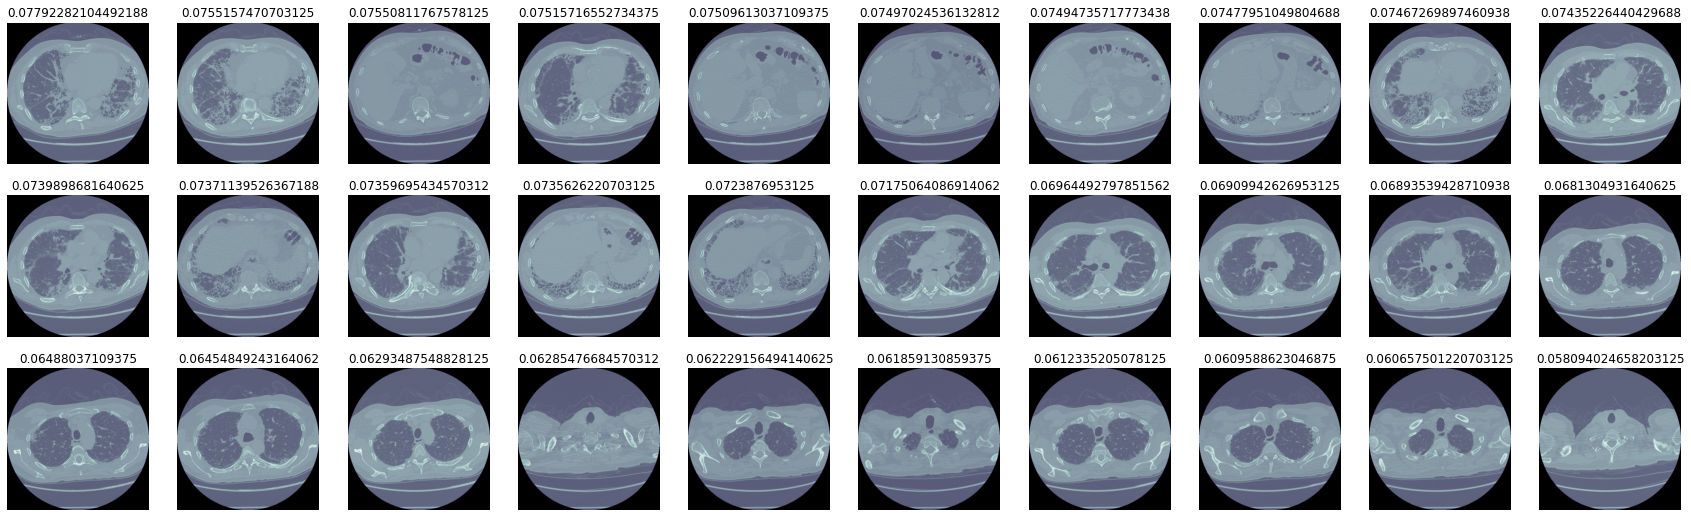

In [ ]:
get_dicom_image(pct[:30], 'img_pct_window', source=source, nrows=3) 

View by `img_mean`

In [ ]:
mean = dicom_dataframe[['PatientID', 'InstanceNumber', 'img_pct_window', 'img_mean', 'img_std']].sort_values(by=['img_mean'], ascending=False).reset_index(drop=True)
mean[:5]

,PatientID,InstanceNumber,img_pct_window,img_mean,img_std
0,ID00007637202177411956430,26,0.074780,216.025375,1223.787277
1,ID00007637202177411956430,27,0.074970,215.649502,1221.412337
2,ID00007637202177411956430,28,0.075096,212.950813,1219.356338
3,ID00007637202177411956430,29,0.075508,210.377762,1217.328780
4,ID00007637202177411956430,25,0.073563,208.641216,1222.713558


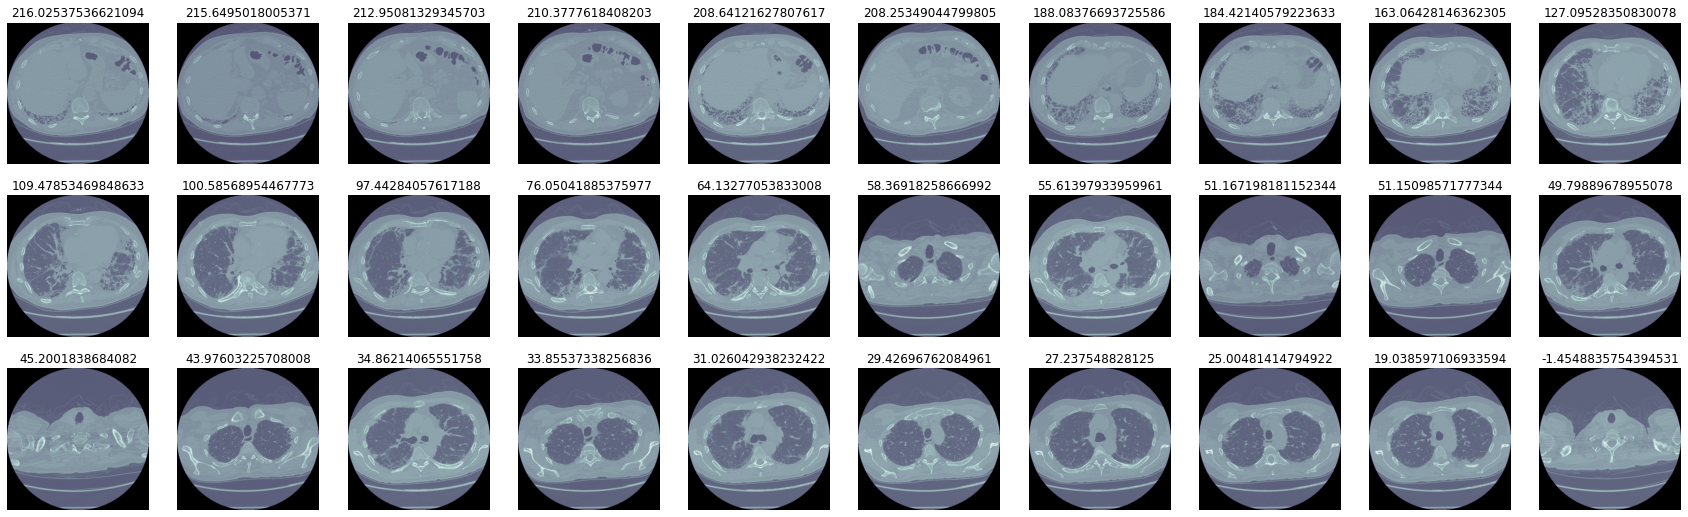

In [ ]:
get_dicom_image(mean[:30], 'img_mean', source=source, nrows=3) 

### dicom convert 3channel

In [ ]:
#export
def dicom_convert_3channel(fn:(Path,str), save_dir, show=False, save=False, win1=dicom_windows.lungs, \
                           win2=dicom_windows.liver, win3=dicom_windows.brain):
    "Split a dicom image into 3 windows with one window per channel and saved as jpg"
    data = fn.dcmread()
    file_name = str(fn); name = file_name.split('\\')[-1].split('.')[0]
        
    chan_one = np.expand_dims(data.windowed(*win1), axis=2)
    chan_two = np.expand_dims(data.windowed(*win2), axis=2)
    chan_three = np.expand_dims(data.windowed(*(win3)), axis=2)
    image = np.concatenate([chan_one, chan_two, chan_three], axis=2)
    ten_image = TensorImage(image).permute(2,0,1)
    if save is not False:
        save_image(ten_image, f'{save_dir}/{name}.jpg')
    else: pass
    if show is not False:
        show_images([chan_one, chan_two, chan_three])
    else: pass

In [ ]:
show_doc(dicom_convert_3channel)

<h4 id="dicom_convert_3channel" class="doc_header"><code>dicom_convert_3channel</code><a href="__main__.py#L2" class="source_link" style="float:right">[source]</a></h4>

> <code>dicom_convert_3channel</code>(**`fn`**:`Path'>, <class 'str'>)`, **`save_dir`**, **`show`**=*`False`*, **`save`**=*`False`*, **`win1`**=*`(1500, -600)`*, **`win2`**=*`(150, 30)`*, **`win3`**=*`(80, 40)`*)

Split a dicom image into 3 windows with one window per channel and saved as jpg

To see how `dicom_convert_3channel works`, specify a save directory and choose a test file

In [ ]:
m_items = get_dicom_files('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430')
save_dir = 'D:/Datasets/osic-pulmonary-fibrosis-progression/test3c/'
test1 = m_items[12]
test1

Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/20.dcm')

Choose 3 windows, one for each channel, in this case `lungs`, `mediastinum` and `pe` (Note the `pe` window is from the `fmi` library)

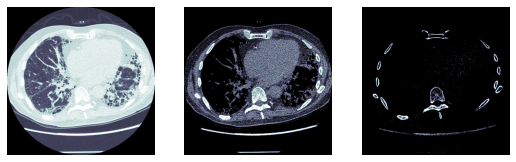

In [ ]:
dicom_convert_3channel(test1, save_dir=save_dir, show=True, win1=dicom_windows.lungs, \
                       win2=dicom_windows.mediastinum, win3=dicom_windows.pe)

In [ ]:
dicom_convert_3channel(test1, save_dir, save=True, win1=dicom_windows.lungs, win2=dicom_windows.mediastinum, win3=dicom_windows.pe)

Load the saved image which saves with the same name as the input image name

In [ ]:
saved_image = PILImage.create('D:/Datasets/osic-pulmonary-fibrosis-progression/test3c/20.jpg')
saved_ten = TensorImage(saved_image)
saved_ten.shape

(512, 512, 3)

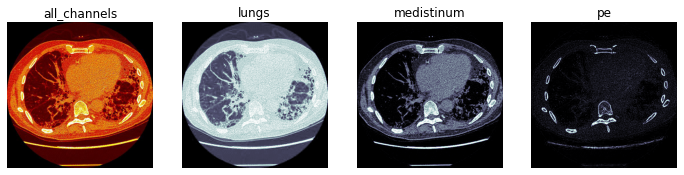

In [ ]:
show_images([saved_ten[:,:,:], saved_ten[:,:,0], saved_ten[:,:,1], saved_ten[:,:,2]],\
            titles=['all_channels', 'lungs', 'medistinum', 'pe'])

### Planes

Scans can be viewed in 3 planes, the Axial plane which divides head from feet, the Sagittal plane which runs between the eyes and the Coronal plane.  More can be found [here](http://dicomiseasy.blogspot.com/2013/06/getting-oriented-using-image-plane.html)

In [ ]:
#export
def show_aspects(fol: (L, str), show=False, save=False, save_path=None, figsize=(7,7), atype=np.float32):
    "View axial, sagittal and coronal planes"
    if isinstance(fol, str): fol = get_dicom_files(fol)
    if isinstance(fol, L): fol = fol
    slices = []
    for i, s in enumerate(instance_sort(fol)):
        im = s[-1].dcmread(); slices.append(im)
    if len(slices)<=0:
        print('There is only 1 slice')
        pass
    else:
        img_shape = list(slices[0].pixel_array.shape)
        img_shape.append(len(slices))
        img3d = np.zeros(img_shape)
        for i, s in enumerate(slices):
            img2d = s.pixel_array; img3d[:, :, i] = img2d
        axial = img3d[:, :, img_shape[2]//2].astype(atype)
        sagittal = img3d[:, img_shape[1]//2, :].astype(atype)
        coronal = img3d[img_shape[0]//2, :, :].T.astype(atype)
        print(f'Number of slices: {len(fol)}')
        if show is not False: show_images([axial, sagittal, coronal], titles=('axial', 'sagittal', 'coronal'), figsize=figsize)
        if save is not False:
            if not os.path.exists(save_path):
                os.makedirs(save_path)
            imageio.imwrite(f'{save_path}/axial.jpg', axial.astype(atype))
            imageio.imwrite(f'{save_path}/sagittall.jpg', sagittal.astype(atype))
            imageio.imwrite(f'{save_path}/coronal.jpg', coronal.astype(atype))

In [ ]:
#hide
source = 'D:/Datasets/osic-pulmonary-fibrosis-progression'
test = f'{source}/train/ID00186637202242472088675'
test30 = f'{source}/train/ID00007637202177411956430'

Number of slices: 408


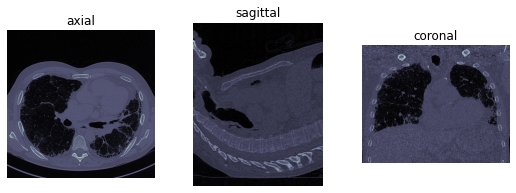

In [ ]:
show_aspects(test, show=True, save=False, save_path='D:\Datasets\osic-pulmonary-fibrosis-progression')

Number of slices: 30


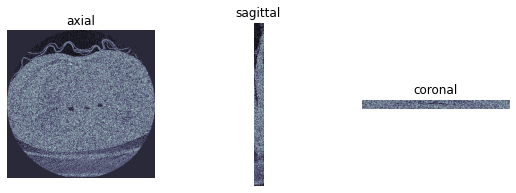

In [ ]:
show_aspects(test30, show=True, atype=np.uint8)

Number of slices: 30


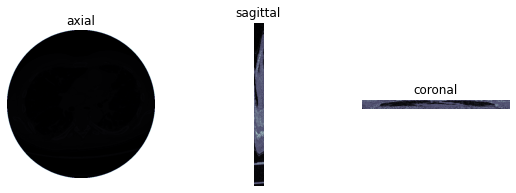

In [ ]:
show_aspects(test30, show=True, atype=np.uint16)

Number of slices: 30


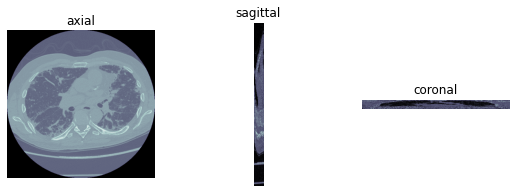

In [ ]:
show_aspects(test30, show=True, atype=np.float32)

### Bounding Boxes

Updates to the core `fastai` library to allow for more flexibility for coloring bounding boxes, `TensorBBox` and `LabeledBBox`.  [Code location](https://github.com/fastai/fastai/blob/master/nbs/07_vision.core.ipynb)

In [ ]:
#export
def _draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(linewidth=lw, foreground='black'), patheffects.Normal()])

In [ ]:
#export
def _draw_rect(ax, b, color='black', text=None, text_size=14, hw=True, rev=False):
    lx,ly,w,h = b
    if rev: lx,ly,w,h = ly,lx,h,w
    if not hw: w,h = w-lx,h-ly
    patch = ax.add_patch(patches.Rectangle((lx,ly), w, h, fill=False, edgecolor=color, lw=2))
    _draw_outline(patch, 4)
    if text is not None:
        patch = ax.text(lx,ly, text, verticalalignment='top', color=color, fontsize=text_size, weight='bold')
        _draw_outline(patch,1)

In [ ]:
#export
class TensorBBox(TensorPoint):
    "Basic type for a tensor of bounding boxes in an image"
    @classmethod
    def create(cls, x, img_size=None)->None: return cls(tensor(x).view(-1, 4).float(), img_size=img_size)

    def show(self, color, ctx=None, **kwargs):
        x = self.view(-1,4)
        for b in x: _draw_rect(ctx, b, hw=False, color=color, **kwargs)
        return ctx

In [ ]:
#export
class LabeledBBox(L):
    "Basic type for a list of bounding boxes in an image"
    def show(self, color, ctx=None, **kwargs):
        for b,l in zip(self.bbox, self.lbl):
            if l != '#na#': ctx = retain_type(b, self.bbox).show(ctx=ctx, text=l, color=color)
        return ctx

    bbox,lbl = add_props(lambda i,self: self[i])

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 02_explore.ipynb.
Converted 03_preprocessing.ipynb.
Converted 04_pipeline.ipynb.
Converted 05_train.ipynb.
Converted 06_examine.ipynb.
Converted 10_wearable.ipynb.
Converted 20_retinanet.ipynb.
Converted 90_tutorial.ipynb.
Converted index.ipynb.
